In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [2]:
email = pd.read_csv("email_table.csv")
opened = pd.read_csv("email_opened_table.csv")
click = pd.read_csv("link_clicked_table.csv")
display(email.head())
display(opened.head())
display(click.head())

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [3]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [4]:
opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [5]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [6]:
print('open_unique:', opened.nunique() == len(opened))
print('click_unique:', click.nunique() == len(click))

open_unique: email_id    True
dtype: bool
click_unique: email_id    True
dtype: bool


In [7]:
opened['open'] = 1
click['click'] = 1

In [8]:
df = pd.merge(email, opened, how='left', on='email_id').fillna(0)
df = df.merge(click, how='left', on='email_id').fillna(0)
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


### What percentage of users opened the email and what percentage clicked on the link within the email?

In [9]:
print("{}% of users opened the email.".format(df['open'].sum()/len(df)*100))
print("{}% of users clicked on the linked within the email.".format(df['click'].sum()/len(df)*100))

# a headup: The data is very imbalanced in terms of click. Might need to deal with this when running model

10.345% of users opened the email.
2.119% of users clicked on the linked within the email.


### The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

**There'd be two steps:**
1. increace the percentage of users who opened the email
2. increase the percentage of clicking on the linked for those who opened the email

*clearly, those who never opened the email would never have a chance on clicking the link*


In [10]:
# Since Email_id is unique, set them as index of the dataframe
df.set_index('email_id', inplace=True)

- According to the instruction, the measurement is click-through rate, which is:
    
    \# click / \# open email

In [11]:
df.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
email_id,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
493711,short_email,generic,6,Monday,UK,1,0.0,0.0
106887,long_email,generic,14,Monday,US,6,0.0,0.0


1. Email_Text

need to be encoded 

In [12]:
df['email_text'].value_counts(normalize=True)

long_email     0.50276
short_email    0.49724
Name: email_text, dtype: float64

In [13]:
df.groupby("email_text").mean()['click']

# short emails have a higher click-through rate

email_text
long_email     0.018538
short_email    0.023872
Name: click, dtype: float64

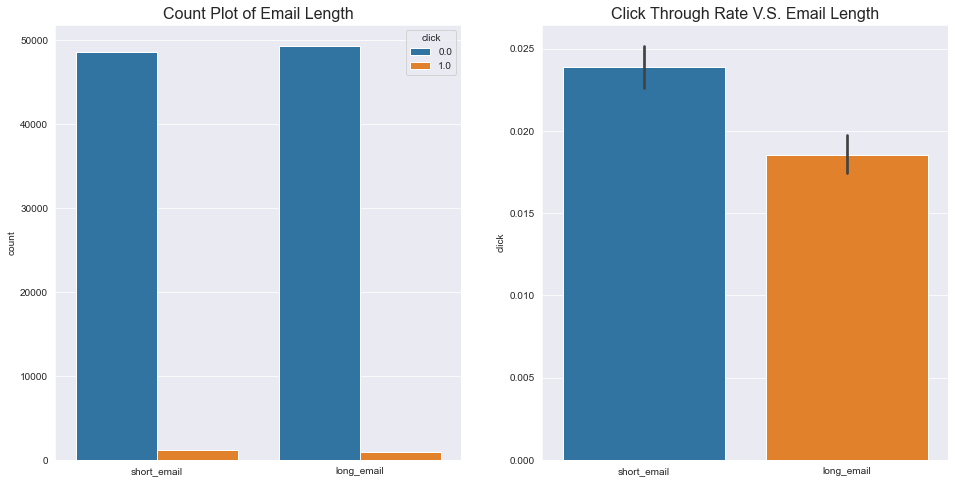

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

sns.countplot(x = 'email_text', hue = 'click', data = df, ax=ax[0])
sns.barplot(x = 'email_text', y='click', data= df, ax=ax[1])

ax[0].set_xlabel("")
ax[0].set_title("Count Plot of Email Length", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_title("Click Through Rate V.S. Email Length", fontsize=16)

plt.show()

2. Email Version

Personalized emails have a higher click-through rate

In [15]:
df['email_version'].value_counts(normalize=True)

generic         0.50209
personalized    0.49791
Name: email_version, dtype: float64

In [16]:
df.groupby("email_version").mean()['click']

email_version
generic         0.015137
personalized    0.027294
Name: click, dtype: float64

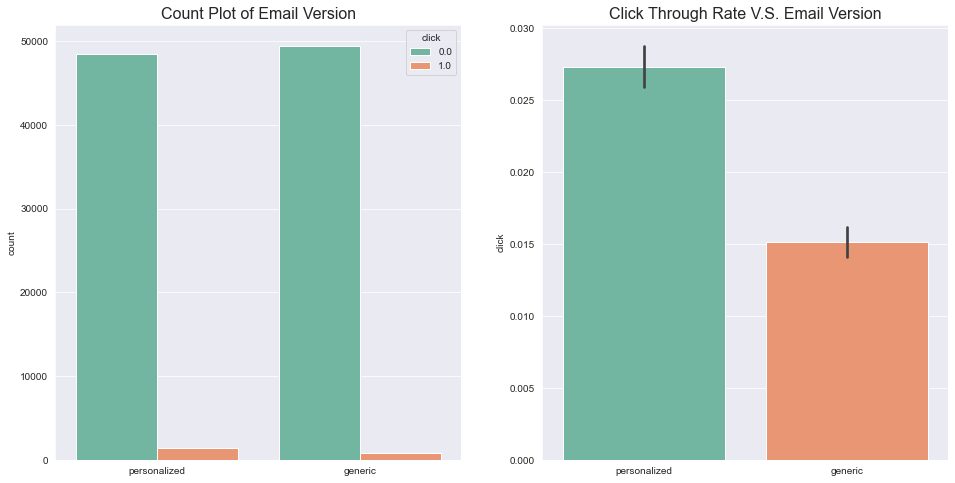

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

sns.countplot(x = 'email_version', hue = 'click', data = df, ax=ax[0], palette="Set2")
sns.barplot(x = 'email_version', y='click', data= df, ax=ax[1], palette="Set2")

ax[0].set_xlabel("")
ax[0].set_title("Count Plot of Email Version", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_title("Click Through Rate V.S. Email Version", fontsize=16)

plt.show()

3. Sent Hour

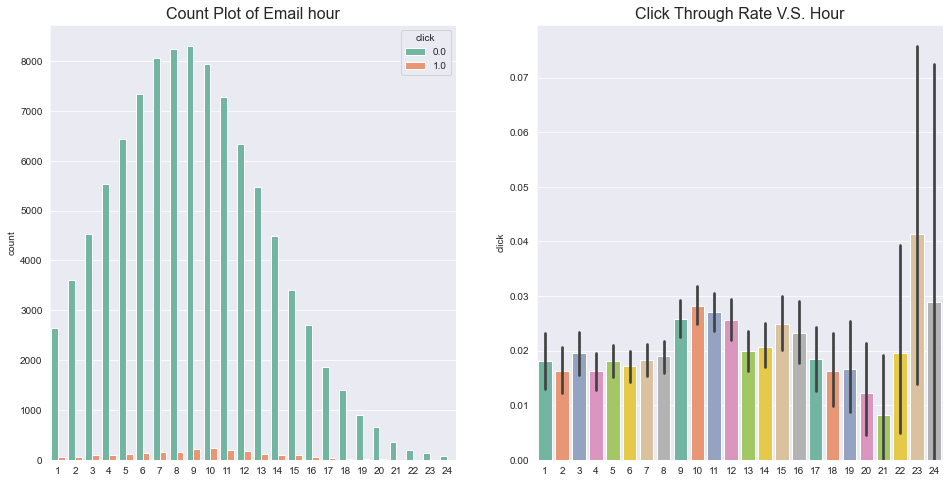

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

sns.countplot(x = 'hour', hue = 'click', data = df, ax=ax[0], palette="Set2")
sns.barplot(x = 'hour', y='click', data= df, ax=ax[1], palette="Set2")

ax[0].set_xlabel("")
ax[0].set_title("Count Plot of Email hour", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_title("Click Through Rate V.S. Hour", fontsize=16)

plt.show()

In [19]:
df['hour'].value_counts().sort_index()

1     2703
2     3676
3     4610
4     5622
5     6551
6     7465
7     8204
8     8398
9     8529
10    8180
11    7483
12    6508
13    5581
14    4580
15    3493
16    2759
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: hour, dtype: int64

In [20]:
# Better set hours into different bins
df['hour_bins'] = pd.qcut(df['hour'],8,duplicates='drop').astype(str)

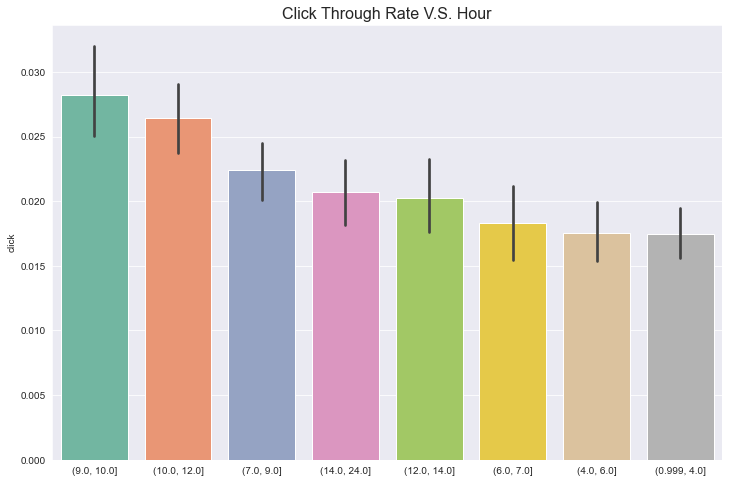

In [21]:
plt.figure(figsize=(12,8))

_ = sns.barplot(x='hour_bins', y='click', 
            order=df.groupby('hour_bins').mean()['click'].sort_values(ascending=False).index,
            data=df, 
            palette="Set2")

_.set_xlabel("")
_.set_title("Click Through Rate V.S. Hour", fontsize=16)

plt.show()

- Emails sent out in the morning have higher click through rate compared with other period of the day

4. Weekday Pattern

In [22]:
df.groupby('weekday')['click'].agg(['sum','mean','count'])

# the emails sent out in different day of week is quite even, yet the click through rate show a diversed pattern.
# Wednesday has the highest click through rate yet Friday has the lowest

,sum,mean,count
weekday,,,
Friday,199.0,0.014037,14177
Monday,329.0,0.022906,14363
Saturday,260.0,0.017846,14569
Sunday,241.0,0.016751,14387
Thursday,349.0,0.024445,14277
Tuesday,352.0,0.024889,14143
Wednesday,389.0,0.027620,14084


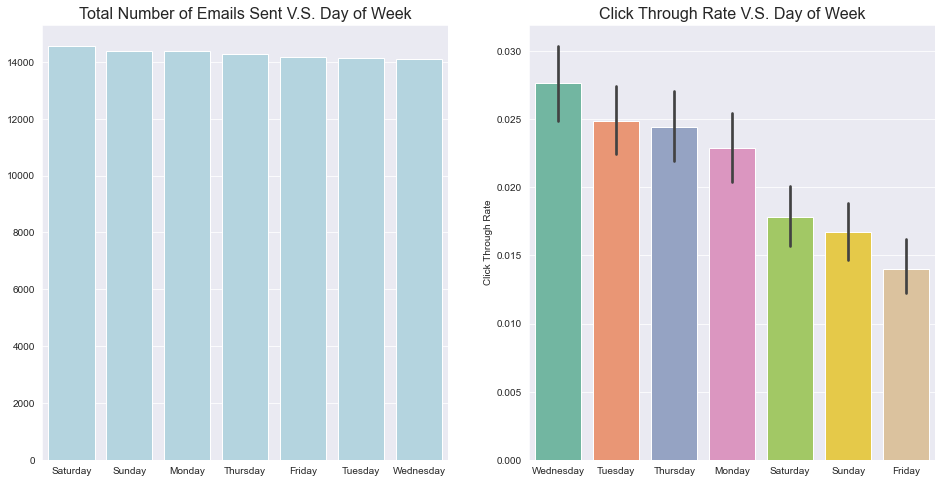

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.countplot(x='weekday',  
            order=df.weekday.value_counts().sort_values(ascending=False).index,
            data=df, ax=ax[0],color='lightblue')

sns.barplot(x='weekday', y='click', 
            order=df.groupby('weekday').mean()['click'].sort_values(ascending=False).index,
            data=df, ax=ax[1],
            palette="Set2")

ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("Total Number of Emails Sent V.S. Day of Week", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_ylabel("Click Through Rate")
ax[1].set_title("Click Through Rate V.S. Day of Week", fontsize=16)

plt.show()

5. User Country



- highest total number of emails sent in US, followed by UK, FR&ES --> US being the major market
- Similar click through rate among US & UK, latter being slightly higher

- imbalanced distribution, consider group ES&FR as EU


In [24]:
df.groupby('user_country')['click'].agg(['mean','sum','count'])

,mean,sum,count
user_country,,,
ES,0.008327,83.0,9967
FR,0.008004,80.0,9995
UK,0.024675,492.0,19939
US,0.024360,1464.0,60099


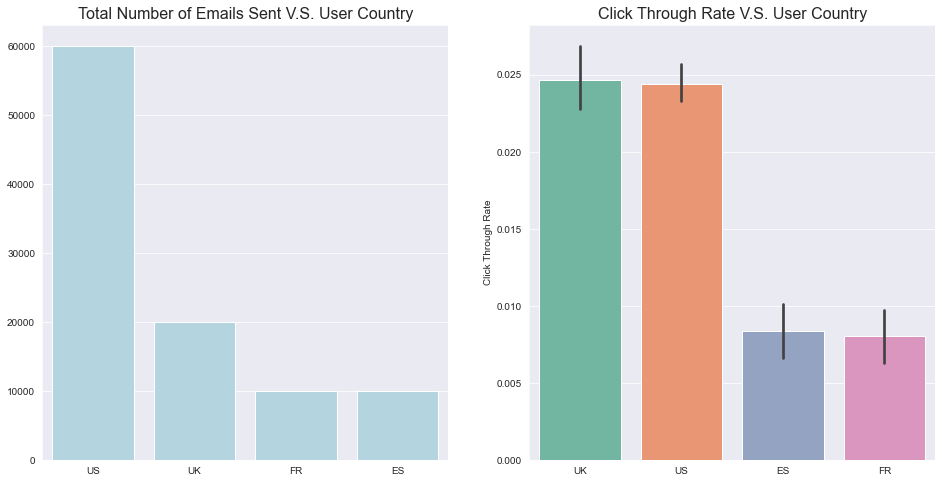

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.countplot(x='user_country',  
            order=df.user_country.value_counts().sort_values(ascending=False).index,
            data=df, ax=ax[0],color='lightblue')

sns.barplot(x='user_country', y='click', 
            order=df.groupby('user_country').mean()['click'].sort_values(ascending=False).index,
            data=df, ax=ax[1],
            palette="Set2")

ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("Total Number of Emails Sent V.S. User Country", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_ylabel("Click Through Rate")
ax[1].set_title("Click Through Rate V.S. User Country", fontsize=16)

plt.show()

In [26]:
# put FR & ES together as EU
df['location'] = np.where((df['user_country'] == 'FR') | (df['user_country'] == 'ES'), 'EU', df['user_country'])

In [27]:
df['location'].value_counts()

US    60099
EU    19962
UK    19939
Name: location, dtype: int64

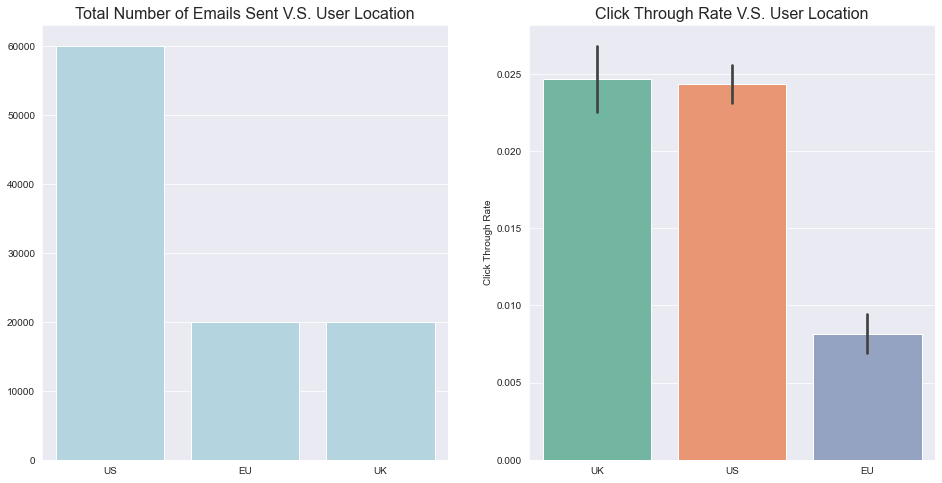

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.countplot(x='location',  
            order=df.location.value_counts().sort_values(ascending=False).index,
            data=df, ax=ax[0],color='lightblue')

sns.barplot(x='location', y='click', 
            order=df.groupby('location').mean()['click'].sort_values(ascending=False).index,
            data=df, ax=ax[1],
            palette="Set2")

ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("Total Number of Emails Sent V.S. User Location", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_ylabel("Click Through Rate")
ax[1].set_title("Click Through Rate V.S. User Location", fontsize=16)

plt.show()

6. User Past Purchases

In [29]:
df['user_past_purchases'].value_counts()

0     13877
1     13751
2     13036
3     12077
4     10743
5      9042
6      7518
7      6051
8      4393
9      3296
10     2363
11     1553
12      944
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
Name: user_past_purchases, dtype: int64

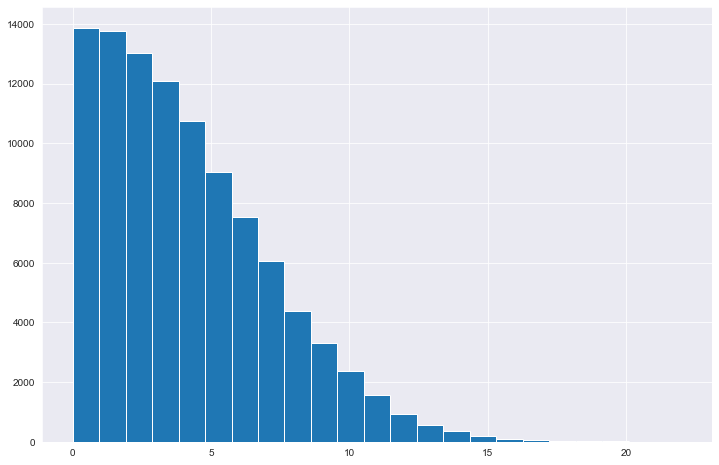

In [30]:
plt.figure(figsize=(12,8))

plt.hist(df['user_past_purchases'], bins=23)

plt.show()

# highly skewed, better take bins of the data

In [31]:
df['past_purchase'] = pd.qcut(df['user_past_purchases'],8,duplicates='drop').astype(str)

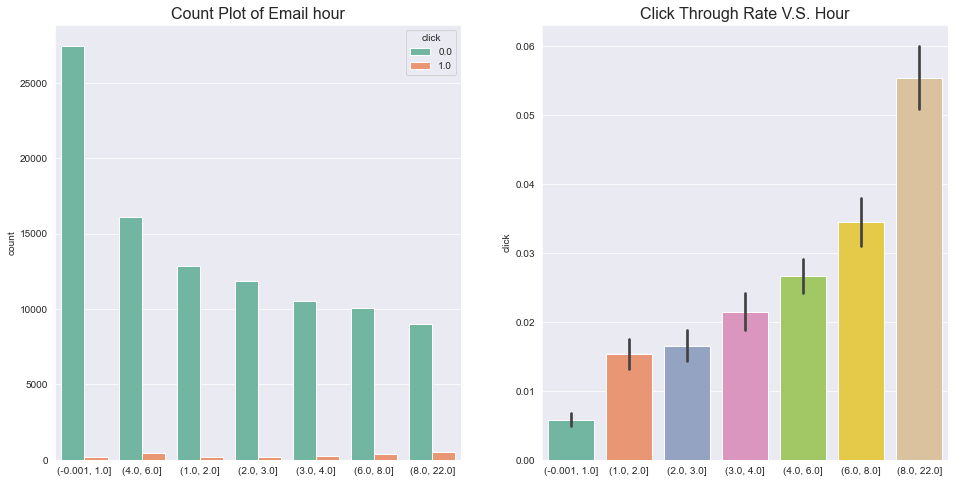

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

sns.countplot(x = 'past_purchase', hue = 'click', 
              order = df['past_purchase'].value_counts().index,
              data = df, ax=ax[0], palette="Set2")
sns.barplot(x = 'past_purchase', y='click', 
            order = df.groupby('past_purchase').mean()['click'].index,
            data= df, ax=ax[1], palette="Set2")

ax[0].set_xlabel("")
ax[0].set_title("Count Plot of Email hour", fontsize=16)

ax[1].set_xlabel("")
ax[1].set_title("Click Through Rate V.S. Hour", fontsize=16)

plt.show()

- the majority of emails were sent to relatively new users 
- or maybe we can say that the number of loyal users are relatively low 
- loyal customers tend to have higher click through rate

## Machine Learning Model: Logistic Regression
1. Oversampling
2. H2ORandomForest

In [69]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,14 days 11 hours 32 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,7 months and 21 days !!!
H2O_cluster_name:,H2O_from_python_chuichuider_fc5muy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.526 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [71]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.4,random_state=42, stratify=df['click'])

In [103]:
df.columns

Index(['email_text', 'email_version', 'hour', 'weekday', 'user_country',
       'user_past_purchases', 'open', 'click', 'hour_bins', 'location',
       'past_purchase'],
      dtype='object')

In [104]:
# predictors = ['email_text','email_version','hour_bins','weekday','location','past_purchase']
predictors = ['email_text', 'email_version', 'hour', 'weekday', 'user_country','user_past_purchases']
target = 'click'

X = train[predictors]
y = pd.DataFrame(train[target])

y.iloc[:,0].value_counts(normalize=True)

0.0    0.978817
1.0    0.021183
Name: click, dtype: float64

In [105]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

sampler = RandomOverSampler(sampling_strategy=0.5,random_state=42)
X_rs, y_rs = sampler.fit_sample(X, y)

df_over = X_rs.merge(y_rs, left_index=True, right_index=True)

df_hex = h2o.H2OFrame(df_over)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [106]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
RF_modl = H2ORandomForestEstimator(
        model_id = 'RF_modl',
        ntrees = 1000,
        nfolds=5,
        min_rows=100,
        seed=1234, categorical_encoding='auto')
RF_modl.train(predictors,target,training_frame=df_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


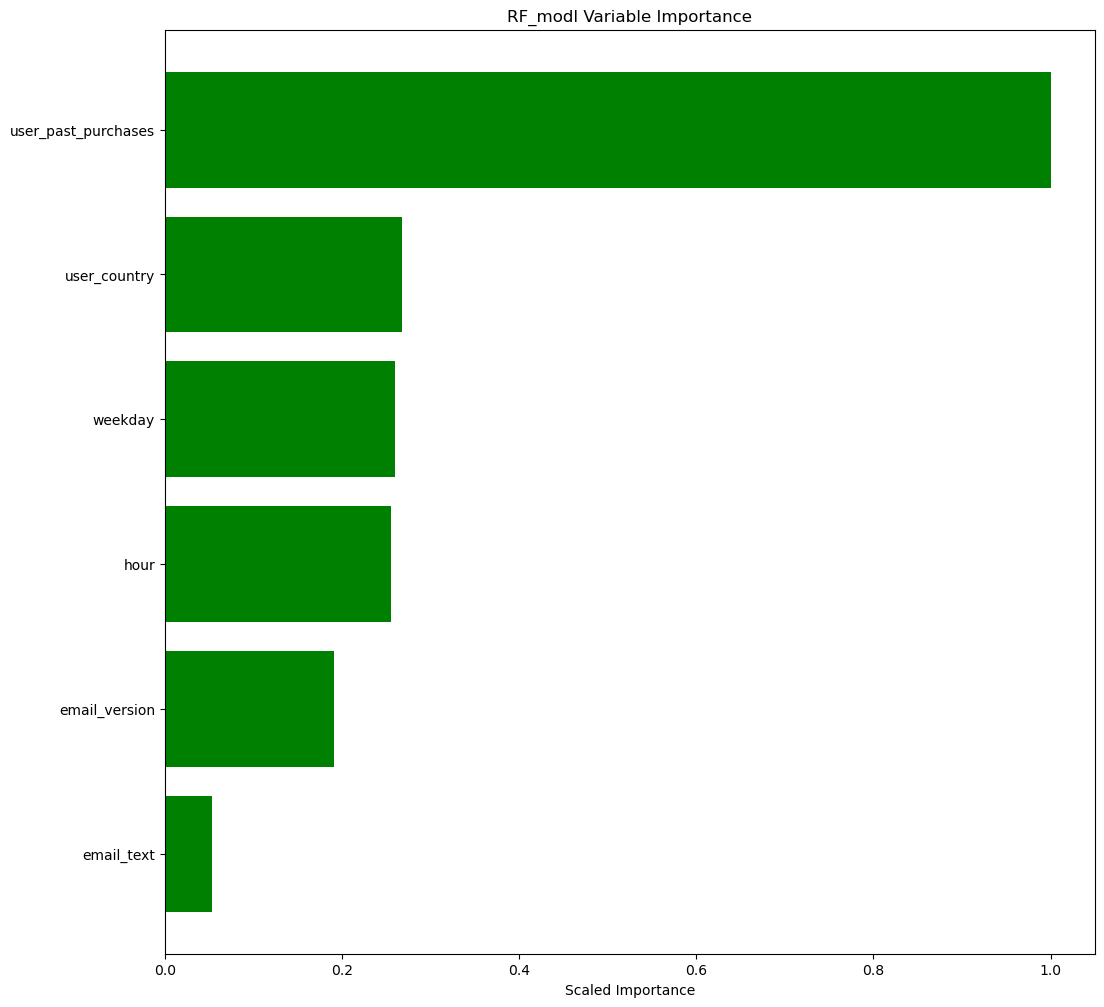

In [107]:
def VarImp(model_name,m_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (12,12))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title(m_name + ' Variable Importance')
    plt.show()
    
VarImp(RF_modl, 'RF_modl')

In [108]:
def actual_predict(model,test_hex,target):
    y_pred = model.predict(test_hex).as_data_frame()
    y_actual = test_hex[target].as_data_frame()
    df_actual_predict = pd.concat([y_actual,y_pred],axis=1)
    df_actual_predict.columns = ['actual','pred']
    return(df_actual_predict)

test_hex = h2o.H2OFrame(test)

RF_actual_predict = actual_predict(RF_modl,test_hex,target)
RF_actual_predict.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


,actual,pred
0,0,0.498610
1,0,0.408255
2,0,0.402867
3,0,0.170686
4,0,0.312483


In [109]:
from sklearn.metrics import roc_curve,roc_auc_score, auc 
from sklearn.metrics import average_precision_score, precision_recall_curve

dd = RF_actual_predict.copy()
RF_roc_auc_value = roc_auc_score(dd['actual'],dd['pred'])
RF_roc_auc_value

0.7398122327782961

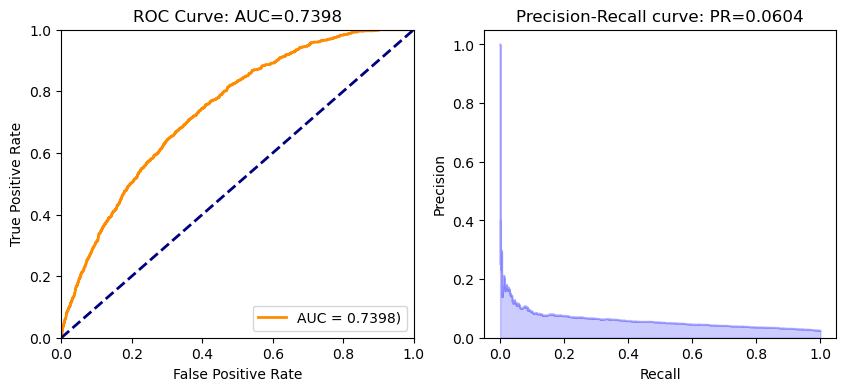

In [110]:
def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.4f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.4f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    
ROC_PR(RF_actual_predict)

In [97]:
from imblearn.datasets import make_imbalance

X_rs, y_rs = make_imbalance(X, y, sampling_strategy={1:1271,0:12710},
                      random_state=0)

df_under = X_rs.merge(y_rs, left_index=True, right_index=True)
df_hex = h2o.H2OFrame(df_under)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [99]:
RF_modl = H2ORandomForestEstimator(
        model_id = 'RF_modl',
        ntrees = 100,
        nfolds=5,
        min_rows=100,
        seed=1234, categorical_encoding='auto')
RF_modl.train(predictors,target,training_frame=df_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [100]:
RF_actual_predict = actual_predict(RF_modl,test_hex,target)
RF_actual_predict.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


,actual,pred
0,0,0.169539
1,0,0.145335
2,0,0.079584
3,0,0.050599
4,0,0.111668


In [101]:
from sklearn.metrics import roc_curve,roc_auc_score, auc 
from sklearn.metrics import average_precision_score, precision_recall_curve

dd = RF_actual_predict.copy()
RF_roc_auc_value = roc_auc_score(dd['actual'],dd['pred'])
RF_roc_auc_value

0.7365665071207717

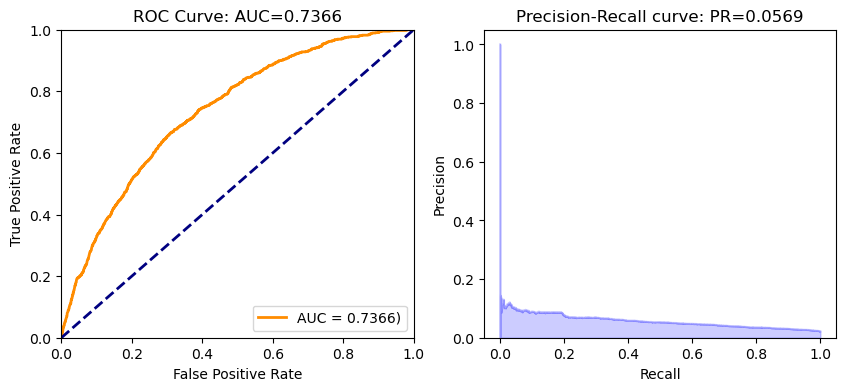

In [102]:
ROC_PR(RF_actual_predict)

### GLM: Easier Explaining

In [119]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# train_smpl = train.sample(frac=0.1, random_state=1)
# test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [120]:
glm_v1 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) #, compute_p_values = True)
glm_v1.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [124]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 187763 to 262926
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   email_text           60000 non-null  object 
 1   email_version        60000 non-null  object 
 2   hour                 60000 non-null  int64  
 3   weekday              60000 non-null  object 
 4   user_country         60000 non-null  object 
 5   user_past_purchases  60000 non-null  int64  
 6   open                 60000 non-null  float64
 7   click                60000 non-null  float64
 8   hour_bins            60000 non-null  object 
 9   location             60000 non-null  object 
 10  past_purchase        60000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 114377 to 664990
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ---

In [121]:
glm_v1.predict(test_hex)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833
1,0.978817,0.0211833


In [114]:
glm_v1.predict(test_hex)['p1']

glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.0216667
0.0216667
0.0216667
0.0216667
0.0216667
0.0216667
0.0216667
0.0216667
0.0216667
0.0216667


In [116]:
predictions = glm_v1.predict(test_hex)['p1']
test_scores = test_hex['click'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


,click,p1
0,0,0.021667
1,0,0.021667
2,0,0.021667
3,0,0.021667
4,0,0.021667


glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



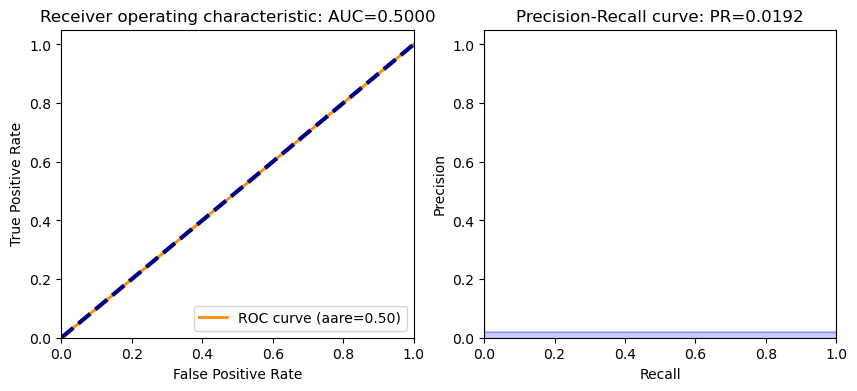

In [118]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df)['p1'].as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()
    
ROC_AUC(glm_v1,test_hex,'click')

In [77]:
# df_hex = h2o.H2OFrame(df)
# train_hex = h2o.H2OFrame(train)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [70]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 85120 to 348333
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_text           100000 non-null  object 
 1   email_version        100000 non-null  object 
 2   hour                 100000 non-null  int64  
 3   weekday              100000 non-null  object 
 4   user_country         100000 non-null  object 
 5   user_past_purchases  100000 non-null  int64  
 6   open                 100000 non-null  float64
 7   click                100000 non-null  float64
 8   hour_bins            100000 non-null  object 
 9   location             100000 non-null  object 
 10  past_purchase        100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.7+ MB


In [34]:
X = df[['email_text','email_version','hour_bins','weekday','location','past_purchase']].copy()
y = df['click'].copy()

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 85120 to 348333
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   email_text     100000 non-null  object
 1   email_version  100000 non-null  object
 2   hour_bins      100000 non-null  object
 3   weekday        100000 non-null  object
 4   location       100000 non-null  object
 5   past_purchase  100000 non-null  object
dtypes: object(6)
memory usage: 5.3+ MB


In [36]:
# convert object to category (category is more efficient than objects)
LABEL = list(X.columns)
categorized_label = lambda x: x.astype('category')
X[LABEL] = X[LABEL].apply(categorized_label, axis=0)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 85120 to 348333
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   email_text     100000 non-null  category
 1   email_version  100000 non-null  category
 2   hour_bins      100000 non-null  category
 3   weekday        100000 non-null  category
 4   location       100000 non-null  category
 5   past_purchase  100000 non-null  category
dtypes: category(6)
memory usage: 1.3 MB


In [37]:
# Encode the Categorical Data - first try with label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtypes == 'category':
        X[col] = le.fit_transform(X[col])
        
X.head()

,email_text,email_version,hour_bins,weekday,location,past_purchase
email_id,,,,,,
85120,1,1,0,3,2,4
966622,0,1,1,3,1,1
777221,0,1,1,6,2,1
493711,1,0,4,1,1,0
106887,0,0,2,1,2,4


In [38]:
# split data into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [39]:
# scale the data?

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [40]:
# Logistic Regression With Model Evaluation
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(rescaled_X_train, y_train)


from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaled_X_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaled_X_test, y_test))
print(confusion_matrix(y_test, y_pred))


from sklearn.model_selection import GridSearchCV

'''Define the grid of values for tol and max_iter'''
tol = [.01, .001, .0001]
max_iter = [100, 150, 200]

'''Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values'''
param_grid = dict({"tol": tol, "max_iter": max_iter})

'''Instantiate GridSearchCV with the required parameters''' 
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

'''Use scaler to rescale X and assign it to rescaledX'''
rescaledX = scaler.fit_transform(X)

'''Fit data to grid_model'''
grid_model_result = grid_model.fit(rescaledX, y)

'''Summarize results'''
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Accuracy of logistic regression classifier:  0.9775333333333334
[[29326     0]
 [  674     0]]
Best: 0.978810 using {'max_iter': 100, 'tol': 0.01}


In [41]:
# suffer from data imbalance, better resampling the data

# decided to go with an oversampling method

In [42]:
df.click.value_counts(normalize=True)

0.0    0.97881
1.0    0.02119
Name: click, dtype: float64

In [43]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
ros = RandomOverSampler(sampling_strategy = 0.3, random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)

In [44]:
y_rs.value_counts(normalize=True)

0.0    0.769233
1.0    0.230767
Name: click, dtype: float64

In [45]:
X_rs.head()

,email_text,email_version,hour_bins,weekday,location,past_purchase
0,1,1,0,3,2,4
1,0,1,1,3,1,1
2,0,1,1,6,2,1
3,1,0,4,1,1,0
4,0,0,2,1,2,4


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0,1))

rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [47]:
# Logistic Regression With Model Evaluation
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(rescaled_X_train, y_train)


from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaled_X_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaled_X_test, y_test))
print(confusion_matrix(y_test, y_pred))


from sklearn.model_selection import GridSearchCV

'''Define the grid of values for tol and max_iter'''
tol = [.01, .001, .0001]
max_iter = [100, 150, 200]

'''Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values'''
param_grid = dict({"tol": tol, "max_iter": max_iter})

'''Instantiate GridSearchCV with the required parameters''' 
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

'''Use scaler to rescale X and assign it to rescaledX'''
rescaledX = scaler.fit_transform(X)

'''Fit data to grid_model'''
grid_model_result = grid_model.fit(rescaledX, y)

'''Summarize results'''
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Accuracy of logistic regression classifier:  0.7788809137109027
[[28481   979]
 [ 7462  1252]]
Best: 0.978810 using {'max_iter': 100, 'tol': 0.01}


In [48]:
grid_model_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200],
                         'tol': [0.01, 0.001, 0.0001]})

In [49]:
y

email_id
85120     0.0
966622    1.0
777221    0.0
493711    0.0
106887    0.0
         ... 
803504    0.0
899722    0.0
449610    0.0
72497     0.0
348333    1.0
Name: click, Length: 100000, dtype: float64

In [66]:
y_grid = pd.DataFrame(grid_model.predict(rescaledX))
actual_predict = pd.concat([y.reset_index().drop('email_id',axis=1),y_grid], axis=1)
actual_predict.columns = ['actual','pred']
actual_predict.head()

,actual,pred
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [67]:
def gains_table(df_actual_predict):
    df_actual_predict = df_actual_predict.sort_values(by='pred',ascending=False)
    df_actual_predict['row_id'] = range(0,0+len(df_actual_predict))
    
    df_actual_predict['decile'] = (df_actual_predict['row_id'] / (len(df_actual_predict)/10)).astype(int)
    df_actual_predict.loc[df_actual_predict['decile'] == 10] =9
    
    # Create gains table
    gains = df_actual_predict.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)

def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.4f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.4f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))


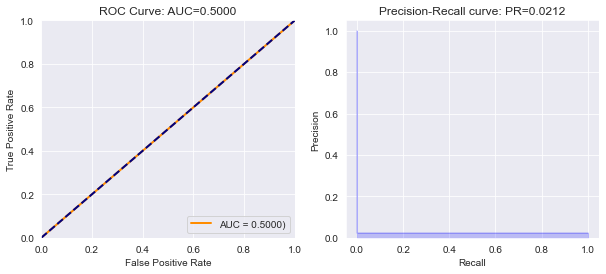

In [68]:
ROC_PR(actual_predict)

In [ ]:
def actual_predict(model,df,target):
    y_pred = pd.DataFrame(model.predict(df[predictors]))
    y_actual = df[target]
    df_actual_predict = pd.concat([y_actual,y_pred],axis=1)
    df_actual_predict.columns = ['actual','pred']
    return(df_actual_predict)

Actual_predict = actual_predict(Best_model,df,target)
Actual_predict.head()

In [223]:
def VarImp(model_name,m_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (12,12))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title(m_name + ' Variable Importance')
    plt.show()

In [225]:
VarImp(logreg, "Logistic Regression")

AttributeError: 'LogisticRegression' object has no attribute '_model_json'

In [103]:
df.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
email_id,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
493711,short_email,generic,6,Monday,UK,1,0.0,0.0
106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [40]:
# split another dataframe for the second point
# data 
data = df[df['open']==1].drop('open', axis=1).copy()
data.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,click
email_id,,,,,,,
966622,long_email,personalized,12,Sunday,UK,2,1.0
139620,short_email,personalized,9,Saturday,US,8,0.0
635573,short_email,personalized,3,Thursday,US,8,0.0
117471,long_email,personalized,5,Saturday,US,1,0.0
364825,short_email,personalized,6,Friday,UK,3,0.0


## Data Exploration

In [60]:
# !pip install plot_utils

In [65]:
sns.set_style("darkgrid")

In [47]:
import plot_utils as pu

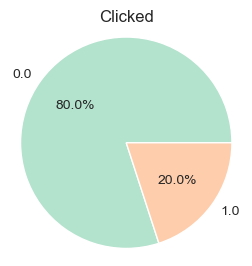

In [62]:
pu.piechart(data['click'], title='Clicked',)
# pu.discrete_histogram(data['email_text'], xlabel='Email_Text_Length')

plt.show()

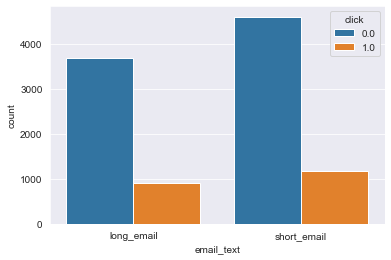

In [66]:
sns.countplot(x='email_text', hue='click', data=data)

In [69]:
data.groupby('email_text').mean()['click']

# seems that short emails lead to slightly higher clicks

email_text
long_email     0.197208
short_email    0.202222
Name: click, dtype: float64

In [70]:
data.groupby('email_version').mean()['click']

# seems that personalized emails lead to slightly higher clicks

email_version
generic         0.182982
personalized    0.210659
Name: click, dtype: float64

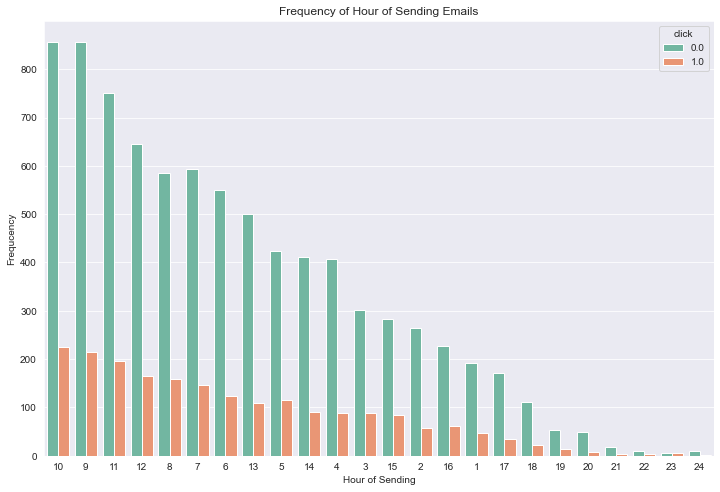

In [72]:
plt.figure(figsize=(12,8))

_ = sns.countplot(data['hour'], order = data['hour'].value_counts().index, palette="Set2", hue=data['click'])

_.set_xlabel('Hour of Sending')
_.set_ylabel('Frequcency')
_.set_title('Frequency of Hour of Sending Emails')

plt.show()

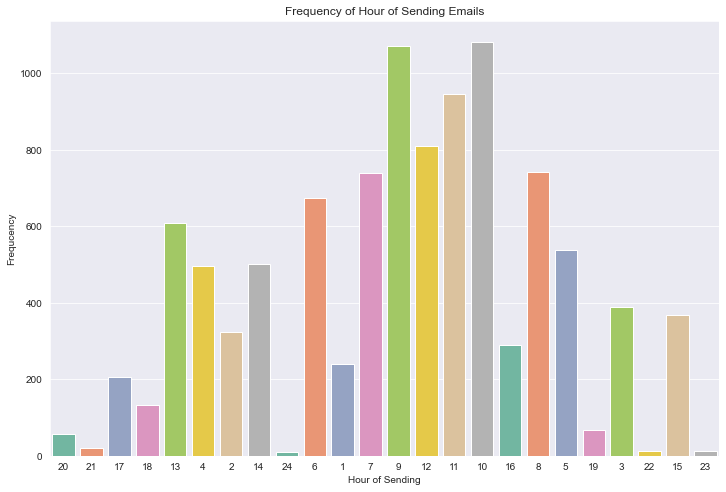

In [76]:
plt.figure(figsize=(12,8))

_ = sns.countplot(data['hour'], order = data.groupby('hour').mean()['click'].sort_values().index, palette="Set2")

_.set_xlabel('Hour of Sending')
_.set_ylabel('Frequcency')
_.set_title('Frequency of Hour of Sending Emails')

plt.show()

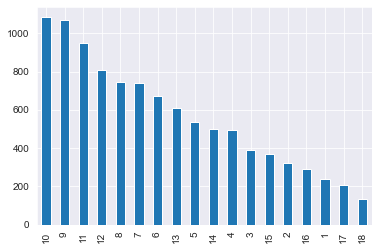

In [81]:
data.hour.value_counts()[data.hour.value_counts()>=100].plot(kind='bar')

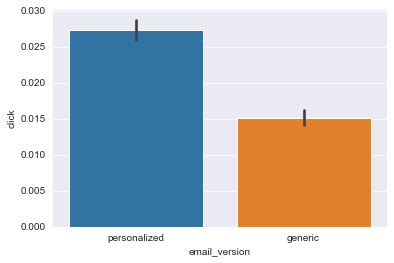

In [83]:
sns.barplot(x='email_version', y='click', data=df)

In [75]:
data.groupby('hour').mean()['click'].sort_values()

hour
20    0.137931
21    0.142857
17    0.169082
18    0.171642
13    0.178982
4     0.179435
2     0.179567
14    0.179641
24    0.181818
6     0.183976
1     0.196653
7     0.197564
9     0.200560
12    0.203704
11    0.208025
10    0.208680
16    0.211073
8     0.212651
5     0.213755
19    0.220588
3     0.228205
22    0.230769
15    0.230978
23    0.500000
Name: click, dtype: float64

In [71]:
data.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,click
email_id,,,,,,,
966622,long_email,personalized,12,Sunday,UK,2,1.0
139620,short_email,personalized,9,Saturday,US,8,0.0
635573,short_email,personalized,3,Thursday,US,8,0.0
117471,long_email,personalized,5,Saturday,US,1,0.0
364825,short_email,personalized,6,Friday,UK,3,0.0


In [51]:
data['click'].value_counts(normalize=True)

0.0    0.8
1.0    0.2
Name: click, dtype: float64

In [41]:
data.email_text.value_counts()

short_email    5761
long_email     4584
Name: email_text, dtype: int64

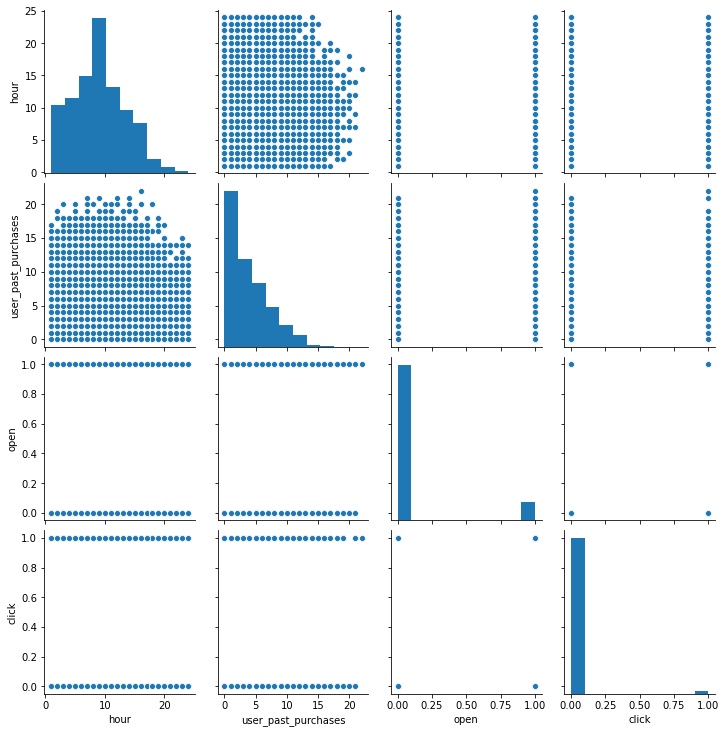

In [32]:
sns.pairplot(df)

In [18]:
df.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
email_id,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
493711,short_email,generic,6,Monday,UK,1,0.0,0.0
106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [19]:
df.email_text.value_counts()

long_email     50276
short_email    49724
Name: email_text, dtype: int64

In [20]:
df.email_version.value_counts()

generic         50209
personalized    49791
Name: email_version, dtype: int64

In [30]:
df.hour.value_counts().sort_index()

1     2703
2     3676
3     4610
4     5622
5     6551
6     7465
7     8204
8     8398
9     8529
10    8180
11    7483
12    6508
13    5581
14    4580
15    3493
16    2759
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: hour, dtype: int64

In [26]:
df.weekday.value_counts()

Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: weekday, dtype: int64

In [27]:
df.user_country.value_counts()

US    60099
UK    19939
FR     9995
ES     9967
Name: user_country, dtype: int64

In [28]:
# group them
df.user_past_purchases.value_counts()

0     13877
1     13751
2     13036
3     12077
4     10743
5      9042
6      7518
7      6051
8      4393
9      3296
10     2363
11     1553
12      944
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
Name: user_past_purchases, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 85120 to 348333
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_text           100000 non-null  object 
 1   email_version        100000 non-null  object 
 2   hour                 100000 non-null  int64  
 3   weekday              100000 non-null  object 
 4   user_country         100000 non-null  object 
 5   user_past_purchases  100000 non-null  int64  
 6   open                 100000 non-null  float64
 7   click                100000 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [ ]:
# turn object to category
LABEL = ['obj_col_1', 'obj_col_2', 'obj_col_3']
categorized_label = lambda x: x.astype('category')
df[LABEL] = df[LABEL].apply(categorized_label, axis=0)